# SemHash

SemHash is a lightweight and flexible tool for deduplicating datasets, filtering outliers, and finding representative samples using semantic similarity. It combines fast embedding generation from [Model2Vec](https://github.com/MinishLab/model2vec) with efficient ANN-based similarity search through [Vicinity](https://github.com/MinishLab/vicinity).

In [1]:
import os
import sys

ROOT_DIR = os.path.dirname(os.getcwd())
sys.path.append(ROOT_DIR)

from utils import *

import pandas as pd
from semhash import SemHash

In [2]:
df = prepare_dataset()

Loading datasets: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


In [3]:
df['index'] = df.index
labels = df['label'].to_list()

In [4]:
class SemHashDeduplicator:
    def __init__(self):
        pass

    def predict(self, df: pd.DataFrame) -> List[int]:
        semhash = SemHash.from_records(records=df.to_dict(orient='records'), columns=['abstract'])
        deduplicated = semhash.self_deduplicate().selected

        indices = np.ones(len(df), dtype=int)
        indices[list(map(lambda x: x['index'], deduplicated))] = 0
        return indices

In [5]:
deduplicator = SemHashDeduplicator()
benchmark = Benchmark(deduplicator)
metrics = benchmark.evaluate(df, labels, verbose=True)

/Users/michalszczygiel/workspace/dupli-gone/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summary:
Metric                        Value
-----------------------------------
Accuracy                    0.80405
Precision                   0.91553
Recall                      0.66991
F1                          0.77369
Prediction_time_sec         2.77785
Samples                  9347.00000
Duplicates               4623.00000


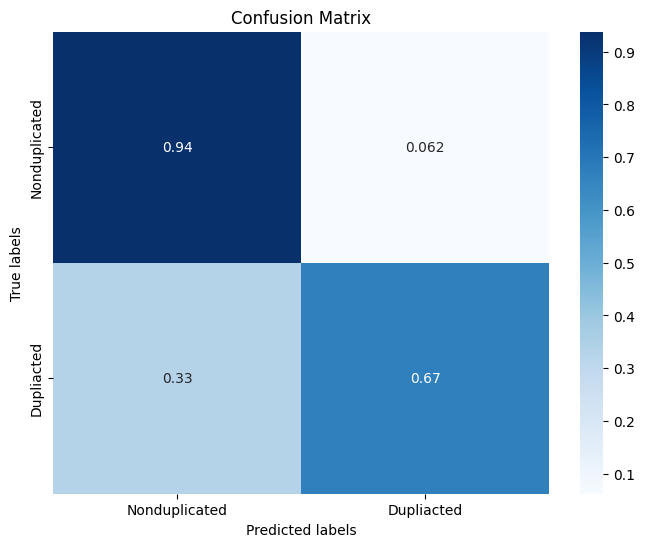

In [6]:
plot_confusion_matrix(y_pred=deduplicator.predict(df), y_true=labels)